In [32]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/imports-exports-v23/Imports_Exports_Dataset new.csv


In [33]:
path ='/kaggle/input/imports-exports-v23/Imports_Exports_Dataset new.csv'
df = pd.read_csv(path)
df.head(5)

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Quantity,Value,Date,Customs_Code,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,1979,9506.57,07-12-2023,620537,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,5763,7100.91,04-04-2023,927600,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,2592,7226.42,09-05-2022,996084,4886.14
3,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,Air,Juliebury,Electronics,2622,2817.29,03-04-2023,555981,4406.74
4,23a7711a-8133-4876-b7eb-dcd9e87a1613,New Zealand,positive,Export,Sea,East Randall,Machinery,6975,657.80,23-07-2021,741778,1497.16


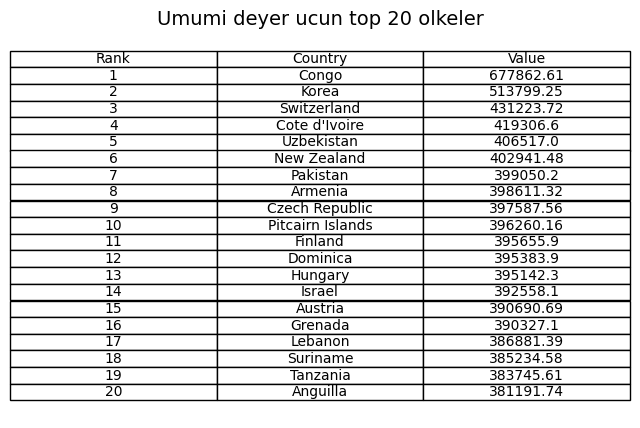

In [34]:
country_value = df.groupby('Country')['Value'].sum().reset_index()
ranked_countries = country_value.sort_values(by='Value', ascending=False)
ranked_countries['Rank'] = range(1, len(ranked_countries) + 1)
ranked_countries = ranked_countries[['Rank', 'Country', 'Value']]
top_10_countries = ranked_countries.head(20)
fig, ax = plt.subplots(figsize=(8, 5)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top_10_countries.values, colLabels=top_10_countries.columns, cellLoc='center', loc='center')
plt.title('Umumi deyer ucun top 20 olkeler', fontsize=14)
plt.show()

In [35]:
trade_category = df['Category'].unique()
trade_category 
trade_value = df['Value'].sum() 
trade_value 
unique_countries = df['Country'].unique()
unique_countries 

array(['Colombia', 'Chile', 'Christmas Island', 'Finland', 'New Zealand',
       'Falkland Islands (Malvinas)', 'Bangladesh', 'Burundi', 'Malawi',
       'Greece', 'Grenada', 'Bahamas', 'Poland', 'Cambodia',
       'Guinea-Bissau', 'Cameroon', 'Paraguay', 'Niger', 'Malaysia',
       'Canada', 'Mauritius', 'Bulgaria', 'Aruba', 'Denmark', 'Estonia',
       'Tonga', 'Burkina Faso', 'Guinea', 'Afghanistan', 'Angola',
       'Czech Republic', 'Seychelles', 'Uganda', 'Mongolia', 'Suriname',
       'Tanzania', 'South Georgia and the South Sandwich Islands',
       'North Macedonia', 'Guadeloupe',
       "Lao People's Democratic Republic", 'Honduras',
       'United States Minor Outlying Islands', 'Cayman Islands',
       'Comoros', 'Somalia', 'Bahrain', 'Uzbekistan', 'Saint Barthelemy',
       'Azerbaijan', 'French Guiana', 'Peru', 'Korea', 'Timor-Leste',
       'Bosnia and Herzegovina', 'Singapore', 'Maldives', 'Australia',
       'Nigeria', 'Mozambique', 'Bhutan', 'Antigua and Barbuda', 'Je

In [36]:

filtered_data = df[df['Country'] == 'Azerbaijan']
country_name = filtered_data['Country'].iloc[0]


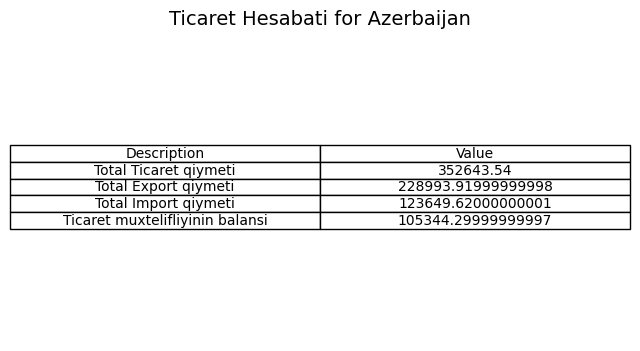

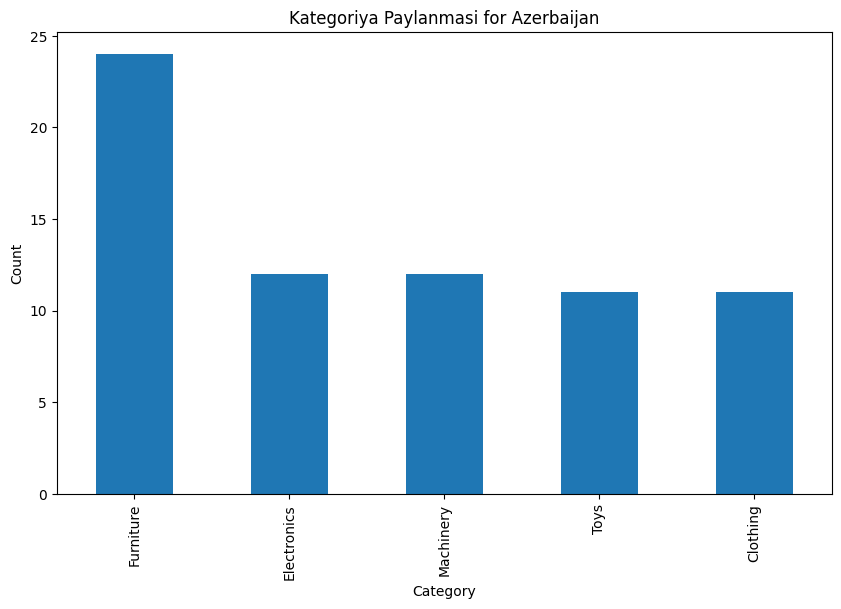

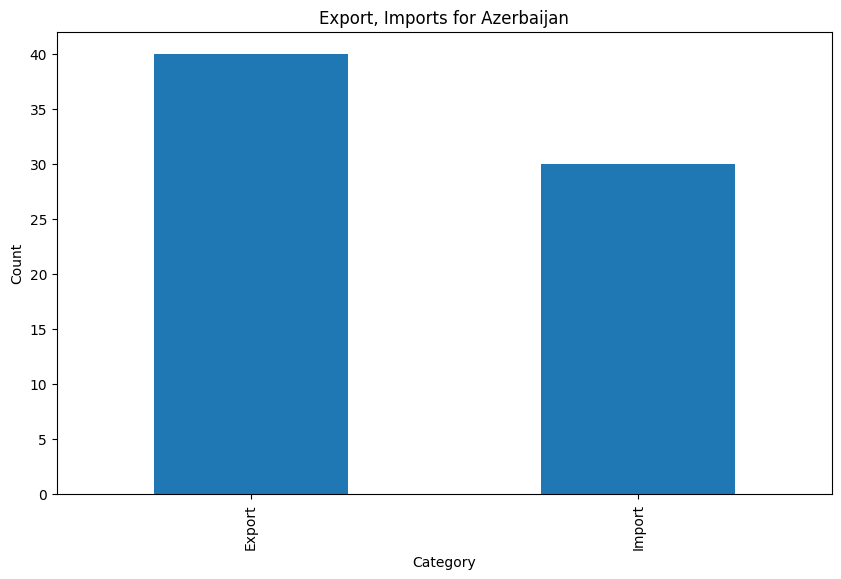

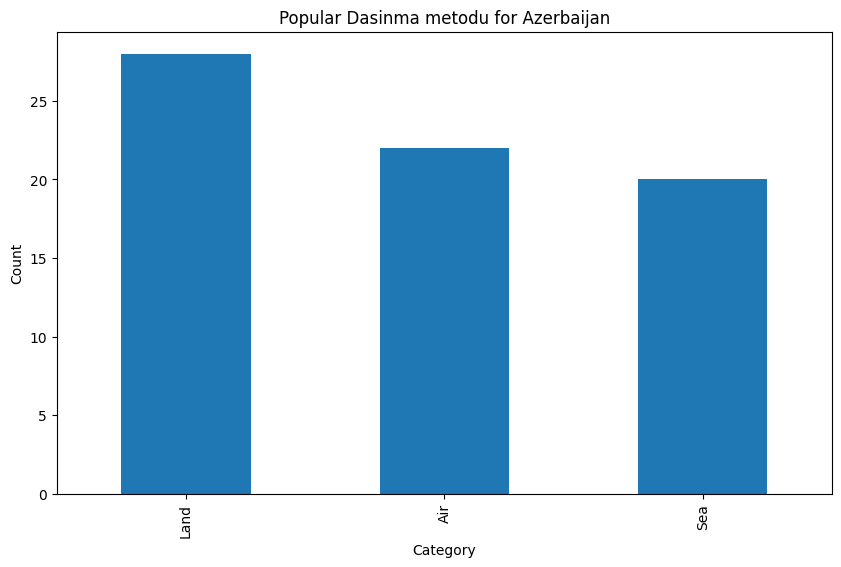

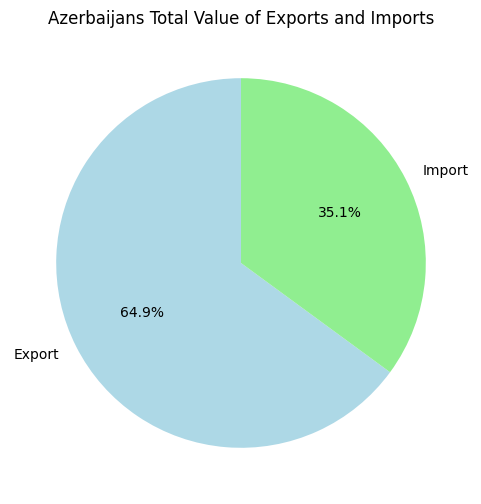

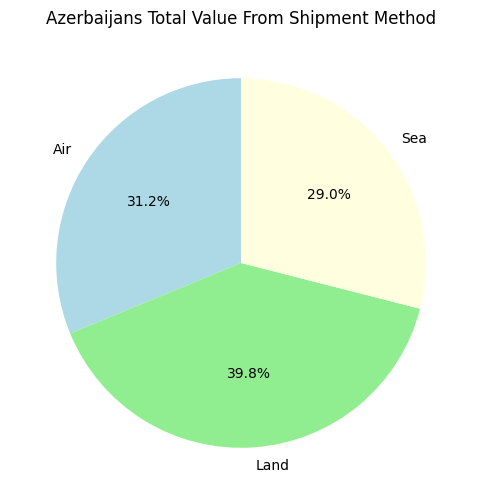

In [37]:
total_trade_value = filtered_data['Value'].sum()
total_exports = filtered_data[filtered_data['Import_Export'] == 'Export']['Value'].sum()
total_imports = filtered_data[filtered_data['Import_Export'] == 'Import']['Value'].sum()
balance_of_trade = total_exports - total_imports
summary_table = pd.DataFrame({
    'Description': [
        'Total Ticaret qiymeti',
        'Total Export qiymeti',
        'Total Import qiymeti',
        'Ticaret muxtelifliyinin balansi'  
    ],
    'Value': [
        total_trade_value,
        total_exports,
        total_imports,
        balance_of_trade 
    ]
})

fig, ax = plt.subplots(figsize=(8, 4))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_table.values, colLabels=summary_table.columns, cellLoc='center', loc='center')
plt.title(f'Ticaret Hesabati for {country_name}', fontsize=14)
plt.show()
category_counts = filtered_data['Category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title(f'Kategoriya Paylanmasi for {country_name}')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
port_counts = filtered_data['Import_Export'].value_counts()
plt.figure(figsize=(10, 6))
port_counts.plot(kind='bar')
plt.title(f'Export, Imports for {country_name}')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
logistic = filtered_data['Shipping_Method'].value_counts()
plt.figure(figsize=(10, 6))
logistic.plot(kind='bar')
plt.title(f'Popular Dasinma metodu for {country_name}')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
grouped_data = filtered_data.groupby('Import_Export')['Value'].sum()
plt.figure(figsize=(6, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title(f'{country_name}s Total Value of Exports and Imports')
plt.show()
grouped_data = filtered_data.groupby('Shipping_Method')['Value'].sum()
plt.figure(figsize=(6, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen','lightyellow'])
plt.title(f'{country_name}s Total Value From Shipment Method')
plt.show()